# Pymaceuticals Inc.
---

### Analysis

1) With a correlation of .84, there is a strong positive relationship between Mouse Weight and Average Tumor size. This would make sense as the tumors would grow on the mice so a larger tumor would lead to an increase in the mouse's weight.

2) There is one outlier in the four drugs we observed in the box plots, that being infubinol. This might suggest to me that there was human error on that one mouse's implementation perhaps, or that the results were similarly tainted in someway. The rest of the data being in the box plots' is an encouraging sign for the rest of the data as that is more observations and data points to go over.

3) Since the gender split was nearly identical, we can assume that the results would apply equally to both genders, though I would like to run this data through the lens of gender to see if this statement holds true
 

In [85]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#This means we can put the duplicate data by itself
dbl_df = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
dbl_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#Since our dbl_df returned just 'g989', we know that g989 has all the duplicate data
#We should be able to just use lock and == "g989" and reproduce the df shown in the starter
g989_df = df.loc[df["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Wasn't as easy as drop_duplicates, so I found a different function: isin()
# So we can exclude rows included 
cleaned = df[df["Mouse ID"].isin(dbl_df) == False]
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
check = cleaned["Mouse ID"].nunique()
check

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#Should do this with variables as it's easier to build the df that way
mean = cleaned["Tumor Volume (mm3)"].groupby(cleaned["Drug Regimen"]).mean()
median = cleaned["Tumor Volume (mm3)"].groupby(cleaned["Drug Regimen"]).median()
variance = cleaned["Tumor Volume (mm3)"].groupby(cleaned["Drug Regimen"]).var()
standard_dev = cleaned["Tumor Volume (mm3)"].groupby(cleaned["Drug Regimen"]).std()
standard_err = cleaned["Tumor Volume (mm3)"].groupby(cleaned["Drug Regimen"]).sem()

stats = pd.DataFrame({"Mean Tumor Volume": mean,
                       "Median Tymor Volume": median,
                       "Tumor Volume Variance": variance,
                       "Tumor Volume Std. Dev.": standard_dev,
                       "Tumor Volume Std. Err.": standard_err})
stats

,Mean Tumor Volume,Median Tymor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = cleaned.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean","median","var","std","sem"])
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Need to first find out the counts of each regimen
drug_count = cleaned["Drug Regimen"].value_counts()
drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Count of Mice')

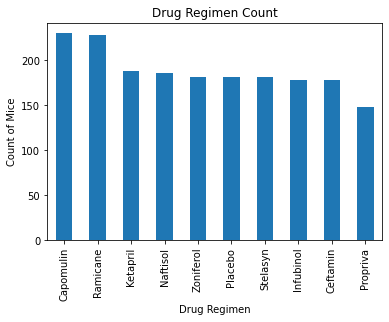

In [102]:
#Create a Pandas bar plot based off the group series from before and label the title
mouse_bar = drug_count.plot.bar()
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#We need to create our x and y axis for the plot
x_axis = drug_count.index.values
mice_count = drug_count.values
y_axis = mice_count

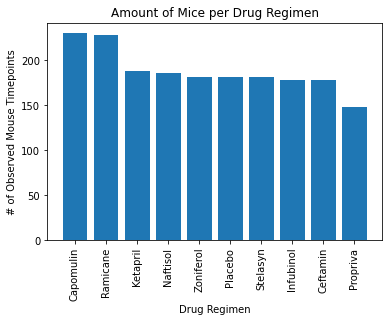

In [104]:
#We'll use the counts as our x axis
plt.bar(x_axis, y_axis, align = "center")
plt.title("Amount of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

Text(0.5, 1.0, 'Breakdown of Mouse by Sex')

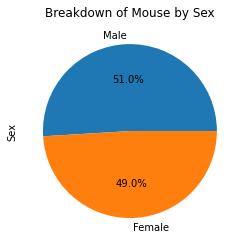

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pie = cleaned['Sex'].value_counts()
mouse_pie.plot.pie(autopct = "%1.1f%%")
plt.title("Breakdown of Mouse by Sex")


Text(0.5, 1.0, 'Breakdown of Mice by Sex')

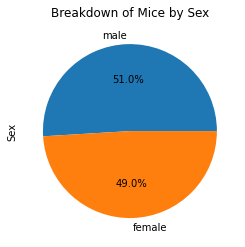

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['male', 'female']
plt.pie(mouse_pie, autopct="%1.1f%%", labels = labels)
plt.ylabel('Sex')
plt.title("Breakdown of Mice by Sex")


## Quartiles, Outliers and Boxplots

In [107]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create a New df with the original df and tumors at their last observed point.
drugs_df = df[df['Drug Regimen'].isin(drug_list)]
drugs_df.head()   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [108]:
#create a variable to store the maximum timepoint for the tumors
max_point = drugs_df.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_max = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

#use the stack and unstack functions to pivot columns and make Mouse ID the index instead of the drugs
max_point = max_point.stack(level=0).unstack(level=0)

max_point

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_max,NaN,NaN,67.973419,NaN
a251,tumor_max,NaN,NaN,65.525743,NaN
a275,tumor_max,NaN,62.999356,NaN,NaN
a411,tumor_max,NaN,NaN,NaN,38.407618
a444,tumor_max,NaN,NaN,NaN,43.047543
...,...,...,...,...,...
y769,tumor_max,NaN,68.594745,NaN,NaN
y793,tumor_max,31.896238,NaN,NaN,NaN
y865,tumor_max,NaN,64.729837,NaN,NaN


In [109]:
#Build the for loop 
drug_treatment = 0
for drug in drug_list:
    quartiles = max_point[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    if drug_treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
drug_treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

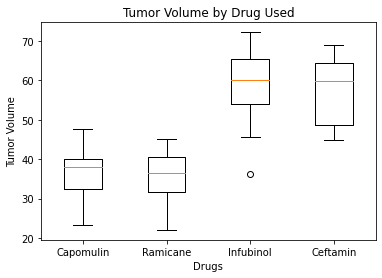

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#First, create a forloop to get rid of NAs in the max_point df and add the values to a list
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(max_point[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
plt.xlabel("Drugs")
plt.xticks([], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Used")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

In [111]:
#Since the next 2 questions deal specifically with Capomulin, it makes sense to make a df of just Capomulin to call 
capo_df = cleaned.loc[cleaned["Drug Regimen"] == "Capomulin",:]
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume (mm3)')

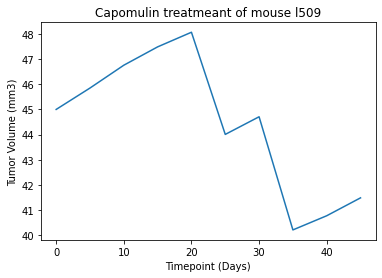

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_plot = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
x_axis = capomulin_plot["Timepoint"]
tumor_size = capomulin_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

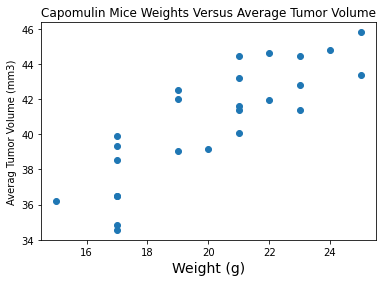

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol =capo_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
plt.title('Capomulin Mice Weights Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The equation of linear regression line is y = 0.95 x + 21.55


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

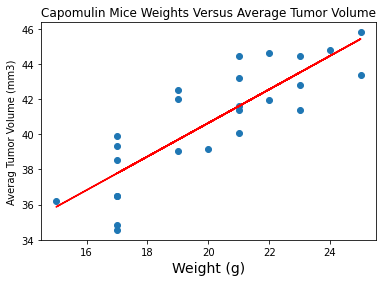

In [114]:
# Calculate the correlation coefficient and a linear regression model 
#we can calculate the correlation via the pearsonr function and the avg groupbys we used in the scatter plot
cor = st.pearsonr(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")
print("The equation of linear regression line is " + f"y = {round(regression.slope, 2)} x + {round(regression.intercept, 2)}")
#We need to build the linear equation, cor is our slope.
regression = st.linregress(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
regression_values = regression.slope * avg_capm_vol['Weight (g)'] + regression.intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#We now pop the regression line onto the scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])
plt.plot(avg_capo_vol['Weight (g)'],regression_values, color = "red")
plt.title('Capomulin Mice Weights Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')